# "Good or Meh" Wine Prediction Model Project
##### Aged by: Mitch Brinkman

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import patsy
from patsy import dmatrices
import statsmodels.api as sm

from sklearn.metrics import precision_recall_curve,confusion_matrix,mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, make_scorer, roc_curve, roc_auc_score, log_loss
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, LassoCV, Ridge, RidgeCV 
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split,learning_curve,cross_val_score, cross_validate, KFold
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from mlxtend.plotting import plot_decision_regions

Using TensorFlow backend.
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/metis/lib/python3.7/site-pa

In [32]:
from wine_func import precision_recall_scores

## Data Import & Cleanliness/Sanity Check

In [33]:
plt.style.use('ggplot')
np.set_printoptions(suppress=True) # Suppress scientific notation where possible

In [ ]:
# df = pd.read_pickle('vinho_wine_data.pickle')
# drop_columns(['wineid', 'citric_acid','free_sulfur_dioxide',
#        'total_sulfur_dioxide', 'density', 'ph', 
#        'quality', 'exp_ph', 'sug_x_diox_ratio', 'red',
#        'white'],df)

In [ ]:
# df.to_pickle('final_wine_data.pickle')

In [34]:
df = pd.read_pickle('vinho_wine_data.pickle')

In [35]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'residual_sugar', 'chlorides',
       'sulphates', 'alcohol', 'sul_diox_ratio', 'good_wine'],
      dtype='object')

## Wine Modeling

In [36]:
y = df['good_wine']
X = df.loc[:,'fixed_acidity':'sul_diox_ratio']

In [37]:
df_model = sm.OLS(y, X, data=df)

results = df_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              good_wine   R-squared (uncentered):                   0.309
Model:                            OLS   Adj. R-squared (uncentered):              0.308
Method:                 Least Squares   F-statistic:                              411.9
Date:                Sun, 10 May 2020   Prob (F-statistic):                        0.00
Time:                        22:40:36   Log-Likelihood:                         -2722.1
No. Observations:                6463   AIC:                                      5458.
Df Residuals:                    6456   BIC:                                      5506.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
fixed_acidity       -0.0282      0.003     -8.119      0.000      -0.035      -0.021
volatile_acidity    -0.3700      0.031    -12.084      0.000      -0.430      -0.310
residual_sugar      -0.0050      0.001     -5.347      0.000      -0.007      -0.003
chlorides           -1.0931      0.157     -6.963      0.000      -1.401      -0.785
sulphates            0.1448      0.035      4.196      0.000       0.077       0.212
alcohol              0.0595      0.002     26.498      0.000       0.055       0.064
sul_diox_ratio      -0.0185      0.002    -11.463      0.000      -0.022      -0.015
==============================================================================
Omnibus:                     1039.952   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1636.062
Skew:                           1.230   Prob(JB):                         0.00
Kurtosis:                       3.138   Cond. No.                         504.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=38 )
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.25, random_state=48)

In [39]:
standardscaler = StandardScaler()
X_train = standardscaler.fit_transform(X_train)
X_test = standardscaler.fit_transform(X_test)

In [40]:
log_model = LogisticRegression(C=.5, solver='lbfgs')
log_model.fit(X = X_train, y = y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Dummy Classifier

In [41]:
print ("Log loss on logit: {:6.4f}".format(log_loss(y_test, log_model.predict_proba
                                                   (X_test))))

Log loss on logit: 0.3747


In [42]:
dum_dum = DummyClassifier()
dum_dum.fit(X_train, y_train)
print ("Log loss on Dummy classifier: {:6.4f}".format(log_loss(y_test, dum_dum.predict_proba
                                                   (X_test)))) 

Log loss on Dummy classifier: 10.8985


In [43]:
print("Logistic accuracy: {:6.4f}".format(log_model.score(X_test, y_test)))
print("Dummy accuracy: {:6.4f}".format(dum_dum.score(X_test, y_test)))

Logistic accuracy: 0.8237
Dummy accuracy: 0.6845


### Deploying each model - not accounting for imbalance

#### Logistic Regression

In [44]:
log_model = LogisticRegression(C=.5, solver='lbfgs')
log_model.fit(X = X_train, y = y_train)
log_auc = roc_auc_score(y_score = log_model.predict_proba(X_test)[:,1],y_true = y_test)
print (f'ROC/AUC score for logistic regression: {log_auc}')

ROC/AUC score for logistic regression: 0.8306237621491004


In [45]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 

fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test)[:,1])

ROC AUC score =  0.8306237621491004


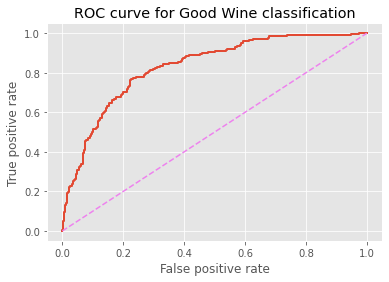

In [46]:
#log_model ROC CURVE

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Good Wine classification');
print("ROC AUC score = ", roc_auc_score(y_test, log_model.predict_proba(X_test)[:,1]))

In [47]:
# using the default threshold of 0.5
y_predict = log_model.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Default threshold:
Precision: 0.5966,   Recall: 0.2829


In [48]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 
def precision_recall_graph (model):
    precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1] )

    plt.figure(dpi=80)
    plt.plot(threshold_curve, precision_curve[1:],label='precision')
    plt.plot(threshold_curve, recall_curve[1:], label='recall')
    plt.legend(loc='lower left')
    plt.xlabel('Threshold (above this probability, label as "good wine"")');
    plt.title('Precision and Recall Curves');

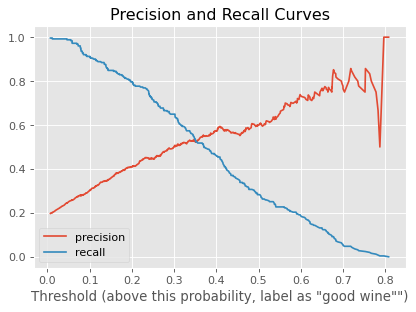

In [50]:
precision_recall_graph(log_model)

In [ ]:
# def precision_recall_scores (model, threshold):
# 	y_predict = (model.predict_proba(X_test)[:,1] > threshold)
# 	print("Threshold of "+ str(threshold) +":")
# 	print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, 
#                                 y_predict),recall_score(y_test, y_predict)))

In [51]:
precision_recall_scores(y_predict, X_test, y_test, log_model,0.369)

Threshold of 0.369:
Precision: 0.5513,   Recall: 0.5139


In [52]:
# f1 score with default threshold
y_predict = log_model.predict(X_test)
f1_score(y_test, y_predict)

0.3837837837837838

In [53]:
def make_confusion_matrix(model, threshold):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    wine_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(wine_confusion, cmap=plt.cm.Reds, annot=True, square=True, fmt='d',
           xticklabels=['meh wine', 'good wine'],
           yticklabels=['meh wine', 'good wine']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

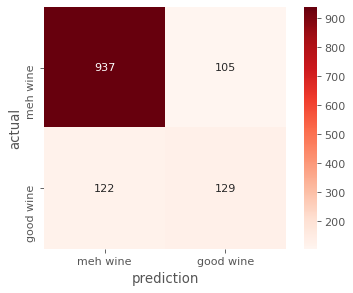

In [54]:
make_confusion_matrix(log_model, .369)

In [92]:
def show_f1_score (model, threshold):
    """
    inputting model type and the threshold derived from the precision/recall
    graph to maximize both will provide the F1 score metric.
    """
    y_predict = (model.predict_proba(X_test)[:, 1] > threshold)
    print(f' F1 score: {f1_score(y_test, y_predict)}')

In [93]:
show_f1_score (log_model, .369)

 F1 score: 0.5319587628865979


#### k Nearest Neighbors Classifier **

In [94]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X = X_train, y = y_train)
print("kNN Training score: {:6.2f}%".format(100*knn_model.score(X_train, y_train)))
# print("    kNN Test: {:6.2f}%".format(100*knn_model.score(X_test, y_test)))

knn_auc = roc_auc_score(y_score = knn_model.predict_proba(X_test)[:,1],y_true = y_test)
print (f'ROC/AUC score for KNN: {knn_auc}')

kNN Training score:  85.04%
ROC/AUC score for KNN: 0.8519090624068028


In [95]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 

fpr, tpr, thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1])

ROC AUC score =  0.8519090624068028


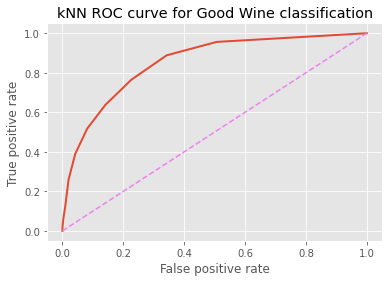

In [96]:
#kNN_model ROC CURVE

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('kNN ROC curve for Good Wine classification');
print("ROC AUC score = ", roc_auc_score(y_test, knn_model.predict_proba(X_test)[:,1]))

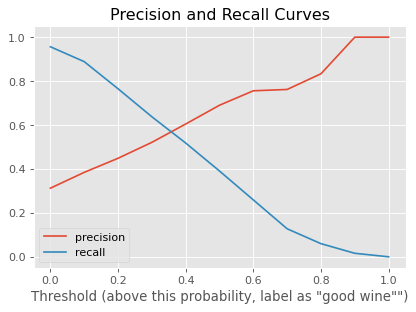

In [97]:
precision_recall_graph(knn_model)

In [98]:
precision_recall_scores(y_predict, X_test, y_test, knn_model,0.38)

Threshold of 0.38:
Precision: 0.5212,   Recall: 0.6375


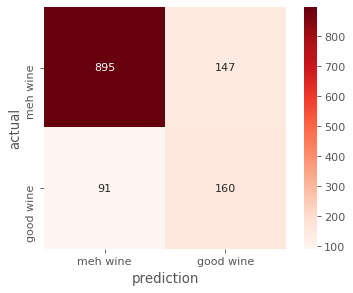

In [99]:
make_confusion_matrix(knn_model,.38)

In [100]:
show_f1_score (knn_model,.38)

 F1 score: 0.5734767025089604


#### Naive Bayes

In [101]:
nb_model = GaussianNB()
nb_model.fit(X= X_train, y=y_train)
nb_auc = roc_auc_score(y_score = nb_model.predict_proba(X_test)[:,1],y_true = y_test)
print (f'ROC/AUC score for Naive Bayes: {nb_auc}')

ROC/AUC score for Naive Bayes: 0.7944880745731087


In [102]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 

fpr, tpr, thresholds = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1])

ROC AUC score =  0.7944880745731087


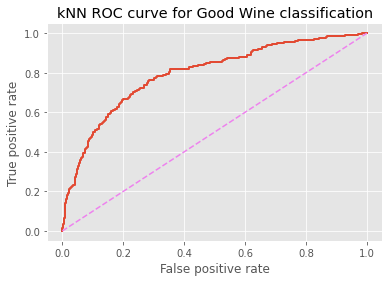

In [103]:
#NB_model ROC CURVE

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('kNN ROC curve for Good Wine classification');
print("ROC AUC score = ", roc_auc_score(y_test, nb_model.predict_proba(X_test)[:,1]))

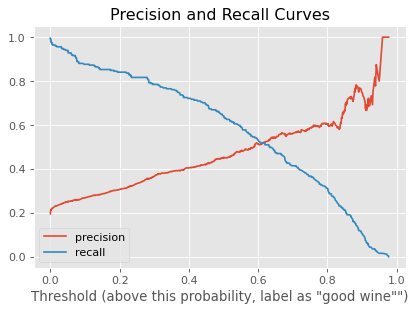

In [104]:
precision_recall_graph(nb_model)

In [105]:
precision_recall_scores(y_predict, X_test, y_test, nb_model,0.6)

Threshold of 0.6:
Precision: 0.5154,   Recall: 0.5339


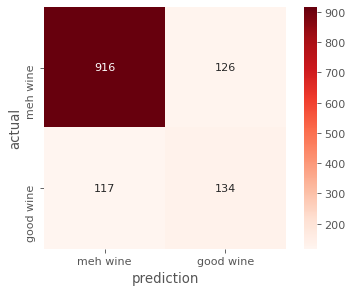

In [106]:
make_confusion_matrix(nb_model,.6)

In [107]:
show_f1_score (nb_model, .6)

 F1 score: 0.5244618395303327


#### SVM ***

In [108]:
svm_model = SVC(C=1.0,probability=True)
svm_model.fit(X= X_train, y=y_train)
svm_auc = roc_auc_score(y_score = svm_model.predict_proba(X_test)[:,1],y_true = y_test)
print (f'ROC/AUC score for SVM: {svm_auc}')

ROC/AUC score for SVM: 0.837138968119843


In [109]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 

fpr, tpr, thresholds = roc_curve(y_test, svm_model.predict_proba(X_test)[:,1])

ROC AUC score =  0.837138968119843


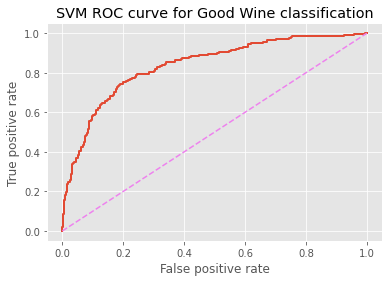

In [110]:
#SVM_model ROC CURVE

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve for Good Wine classification');
print("ROC AUC score = ", roc_auc_score(y_test, svm_model.predict_proba(X_test)[:,1]))

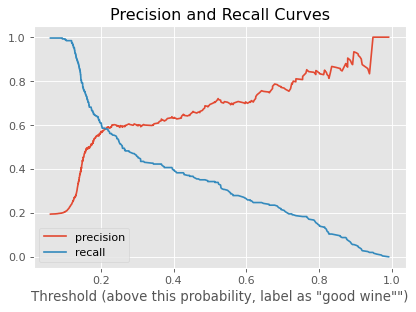

In [111]:
precision_recall_graph(svm_model)

In [112]:
precision_recall_scores(y_predict, X_test, y_test, knn_model,0.21)

Threshold of 0.21:
Precision: 0.4486,   Recall: 0.7649


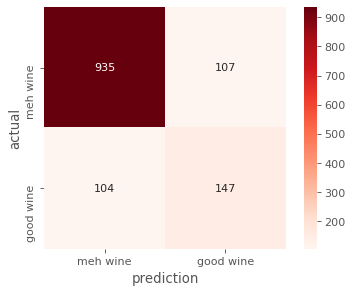

In [113]:
make_confusion_matrix(svm_model,.21)

In [114]:
show_f1_score (svm_model, .21)

 F1 score: 0.5821782178217823


#### Decision Tree

In [115]:
tree_model = DecisionTreeClassifier(max_depth=4)
tree_model.fit(X = X_train, y= y_train)
tree_auc = roc_auc_score(y_score = tree_model.predict_proba(X_test)[:,1],y_true = y_test)
print (f'ROC/AUC score for Decision Tree: {tree_auc}')

ROC/AUC score for Decision Tree: 0.8129573835177524


In [116]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 

fpr, tpr, thresholds = roc_curve(y_test, tree_model.predict_proba(X_test)[:,1])

ROC AUC score =  0.8129573835177524


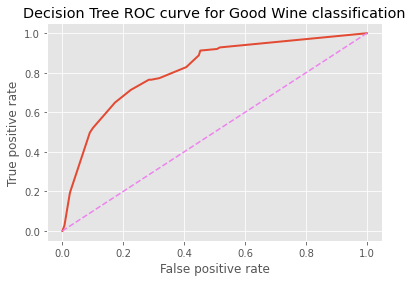

In [117]:
#DecisionTree_model ROC CURVE

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree ROC curve for Good Wine classification');
print("ROC AUC score = ", roc_auc_score(y_test, tree_model.predict_proba(X_test)[:,1]))

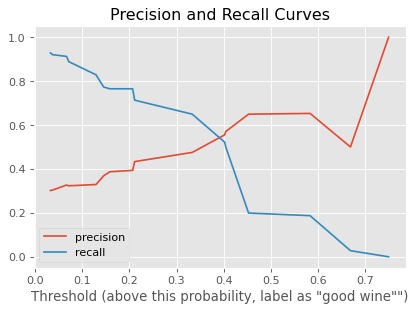

In [118]:
precision_recall_graph(tree_model)

In [119]:
precision_recall_scores(y_predict, X_test, y_test, knn_model,0.405)

Threshold of 0.405:
Precision: 0.6047,   Recall: 0.5179


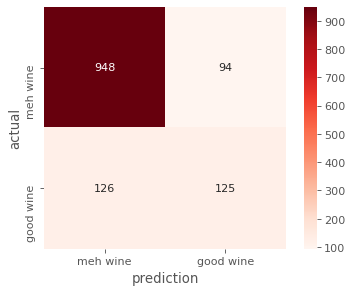

In [120]:
make_confusion_matrix(tree_model,.405)

In [121]:
show_f1_score (tree_model, .405)

 F1 score: 0.5319148936170213


#### Random Forest *

In [143]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth= 7, max_features=7)
rf_model.fit(X = X_train, y= y_train)
rf_auc = roc_auc_score(y_score = rf_model.predict_proba(X_test)[:,1],y_true = y_test)
print (f'ROC/AUC score for Random Forest: {rf_auc}')

ROC/AUC score for Random Forest: 0.8743261120584839


In [123]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 

fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

ROC AUC score =  0.8986568122901866


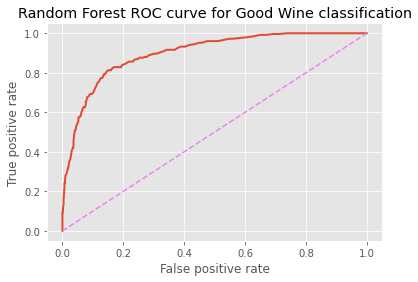

In [124]:
#Random_Forest_model ROC CURVE

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve for Good Wine classification');
print("ROC AUC score = ", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))

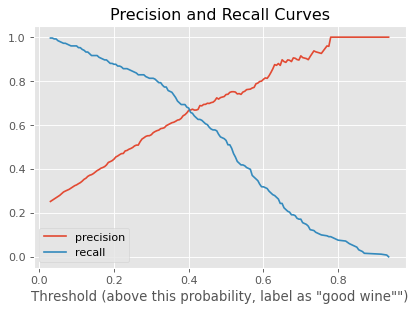

In [125]:
precision_recall_graph(rf_model)

In [126]:
precision_recall_scores(y_predict, X_test, y_test, knn_model,0.407)

Threshold of 0.407:
Precision: 0.6047,   Recall: 0.5179


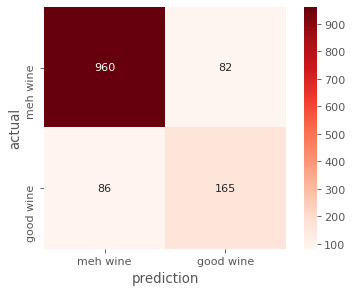

In [127]:
make_confusion_matrix(rf_model,.407)

In [128]:
show_f1_score (rf_model, .407)

 F1 score: 0.6626506024096385


In [ ]:
# precision_recall_graph(rf_model)
# plt.savefig('pr_recall_40.png')

In [ ]:
# make_confusion_matrix(rf_model,.4)
# plt.savefig('RF_model_40.png')

In [129]:
k = list(X.columns)
print(sorted(list(zip(k, rf_model.feature_importances_)), key=lambda x: x[1], reverse=True))

[('alcohol', 0.21119839992930106), ('sul_diox_ratio', 0.14929972775685876), ('chlorides', 0.14006918076198907), ('volatile_acidity', 0.13996502116160672), ('residual_sugar', 0.12859519125354765), ('sulphates', 0.12009374834362924), ('fixed_acidity', 0.1107787307930676)]


### Dealing with Class Imbalance

#### Oversampling modeling on 3 best performers

In [130]:
over_samp = RandomOverSampler(random_state=11)
X_over_samp, y_over_samp = over_samp.fit_sample(X_train,y_train)

In [131]:
# Balance check
Counter(y_over_samp)

Counter({0: 3119, 1: 3119})

In [144]:
##RF model with oversampling performs with the best ROC/AUC score##
rf_model_os = RandomForestClassifier(n_estimators=100, max_depth= 7, max_features=7)
rf_model_os.fit(X = X_over_samp, y = y_over_samp)
print("Random Forest Training score: {:6.2f}%".format(100*rf_model_os.score(X_over_samp, y_over_samp)))
rf_auc_os = roc_auc_score(y_score = rf_model_os.predict_proba(X_test)[:,1],y_true = y_test)
print (f'ROC/AUC score for Random Forest: {rf_auc_os}')

Random Forest Training score:  87.62%
ROC/AUC score for Random Forest: 0.8605921802234441


In [148]:
knn_model_os = KNeighborsClassifier(n_neighbors=5)
knn_model_os.fit(X = X_over_samp, y = y_over_samp)
print("kNN Training score: {:6.2f}%".format(100*knn_model_os.score(X_over_samp, y_over_samp)))
# print("    kNN Test: {:6.2f}%".format(100*knn_model.score(X_test, y_test)))

knn_auc_os = roc_auc_score(y_score = knn_model.predict_proba(X_test)[:,1],y_true = y_test)
print (f'ROC/AUC score for KNN: {knn_auc_os}')

kNN Training score:  89.96%
ROC/AUC score for KNN: 0.8519090624068028


In [162]:
svm_model_os = SVC(C=1.0,probability=True)
svm_model_os.fit(X= X_over_samp, y=y_over_samp)
print("SVM Training score: {:6.2f}%".format(100*svm_model_os.score(X_over_samp, y_over_samp)))
svm_auc_os = roc_auc_score(y_score = svm_model_os.predict_proba(X_test)[:,1],y_true = y_test)
print (f'ROC/AUC score for SVM: {svm_auc_os}')

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Training score:  78.90%
ROC/AUC score for SVM: 0.8505765804345


#### Undersampling modeling on 3 best performers

In [150]:
X_under, y_under = RandomUnderSampler(random_state=21).fit_sample(X_train,y_train)

In [151]:
Counter(y_under)

Counter({0: 758, 1: 758})

In [158]:
##RF model with undersampling performs with the best ROC/AUC score##
rf_model_us = RandomForestClassifier(n_estimators=100, max_depth= 7, max_features=7)
rf_model_us.fit(X = X_under, y = y_under)
print("Random Forest Training score: {:6.2f}%".format(100*rf_model_us.score(X_under, y_under)))
rf_auc_us = roc_auc_score(y_score = rf_model_us.predict_proba(X_test)[:,1],y_true = y_test)
print (f'ROC/AUC score for Random Forest: {rf_auc_us}')

Random Forest Training score:  90.04%
ROC/AUC score for Random Forest: 0.8707817482469354


In [153]:
knn_model_us = KNeighborsClassifier(n_neighbors=20)
knn_model_us.fit(X = X_under, y = y_under)
print("kNN Training score: {:6.2f}%".format(100*knn_model_us.score(X_under, y_under)))
# print("    kNN Test: {:6.2f}%".format(100*knn_model.score(X_test, y_test)))

knn_auc_us = roc_auc_score(y_score = knn_model_us.predict_proba(X_test)[:,1],y_true = y_test)
print (f'ROC/AUC score for KNN: {knn_auc_us}')

kNN Training score:  78.36%
ROC/AUC score for KNN: 0.8648037408905646


In [163]:
svm_model_us = SVC(C=1.0,probability=True)
svm_model_us.fit(X= X_under, y=y_under)
print("SVM Training score: {:6.2f}%".format(100*svm_model_us.score(X_under, y_under)))
svm_auc_us = roc_auc_score(y_score = svm_model_us.predict_proba(X_test)[:,1],y_true = y_test)
print (f'ROC/AUC score for SVM: {svm_auc_us}')

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Training score:  79.82%
ROC/AUC score for SVM: 0.8487661637519022


### Cross Validation

In [159]:
X, y = np.array(X), np.array(y)

In [165]:
#Random Forest UNDERSAMPLING Cross Validation

kf = KFold(n_splits=5, shuffle=True, random_state = 21)
cv_rf_r2s = [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    rf_model = rf_model_us

    rf_model.fit(X_train_scaled, y_train)
    cv_rf_r2s.append(rf_model.score(X_val_scaled, y_val))

#Random Forest Classifier score
print('Random Forest Classifier scores: ', cv_rf_r2s)

#Random Forest Cross validation r-square
print(f'KNN mean cv r^2: {np.mean(cv_rf_r2s):.3f} +- {np.std(cv_rf_r2s):.3f}')


Random Forest Classifier scores:  [0.8275328692962104, 0.8468677494199536, 0.8607888631090487, 0.8405572755417957, 0.8382352941176471]
KNN mean cv r^2: 0.843 +- 0.011


In [166]:
#KNN UNDERSAMPLING Cross Validation

kf = KFold(n_splits=5, shuffle=True, random_state = 21)
cv_knn_r2s = [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    knn_model = knn_model_us

    knn_model.fit(X_train_scaled, y_train)
    cv_knn_r2s.append(knn_model.score(X_val_scaled, y_val))

#K Nearest Neighbors Classifier score
print('K Nearest Neighbors scores: ', cv_knn_r2s)

#K Nearest Neighbors Cross validation r-square
print(f'KNN mean cv r^2: {np.mean(cv_knn_r2s):.3f} +- {np.std(cv_knn_r2s):.3f}')


K Nearest Neighbors scores:  [0.8205723124516628, 0.8522815158546017, 0.8445475638051044, 0.8219814241486069, 0.8297213622291022]
KNN mean cv r^2: 0.834 +- 0.013


## Ensembling & Testing

In [167]:
ensemble = (rf_model_us.predict_proba(X_test)[:,1] +
           knn_model_us.predict_proba(X_test)[:,1]) / 2
ensemble_auc = roc_auc_score(y_score = ensemble, y_true = y_test)
print (f'ROC/AUC score for Ensembling: {ensemble_auc}')

ROC/AUC score for Ensembling: 0.91514938327305


In [168]:
print("Random Forest Test score: {:6.2f}%".format(100*rf_model_us.score(X_test, y_test)))
rf_auc_us = roc_auc_score(y_score = rf_model_us.predict_proba(X_test)[:,1],y_true = y_test)
print (f'ROC/AUC score for Random Forest: {rf_auc_us}')

Random Forest Test score:  87.70%
ROC/AUC score for Random Forest: 0.9185943366648569


#### Random forest with undersampling is my chosen model!

## Pickling Model for Flask App

In [169]:
import pickle

In [170]:
mitch_model = 'finalized_rf_model.pickle'
pickle.dump(rf_model_us,open(mitch_model,'wb'))
